# **This is a initial descriptive analysis of the Reddit wallstreetbets posts. It contains a basic statistics of words, character count, and occurence. At the bottom, you will find the analysis of the most common mentioned NYSE or other stock tickers. Enjoy!**

**Short summary:**
The average title length is 11 words.
The average title length is 120 words.
The most popular words are, without a surprise: gme, buy, robinhood, hold, amc.
The most popular tickers are: gme, know, one, hold, see, time, big, amc

# Import the libraries

In [1]:
import os
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import date, datetime
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats
from nltk.corpus import stopwords
from collections import Counter

# Read the dataframe

In [2]:
df = pd.read_csv('/kaggle/input/reddit-wallstreetsbets-posts/reddit_wsb.csv')

# Check the head of the dataframe

In [3]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


# Drop useless columns

In [4]:
df = df.drop(columns=['id', 'url', 'created'])
df.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


In [5]:
df.shape

(32757, 5)

# Add a few data realted columns for further analysis

In [6]:
from datetime import date, datetime
year_col = []
month_col = []
hour_col = []
minute_col = []
for i, content in df['timestamp'].items():
    t1 = datetime.strptime(content, '%Y-%m-%d %H:%M:%S')
    year_col.append(t1.year)
    month_col.append(t1.month)
    hour_col.append(t1.hour)
    minute_col.append(t1.minute)
df['year'] = year_col
df['month'] = month_col
df['hour'] = hour_col
df['minute'] = minute_col

In [7]:
df.head()

,title,score,comms_num,body,timestamp,year,month,hour,minute
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021,1,21,30
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57,2021,1,21,28
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56,2021,1,21,26


# Normalize the text to be lowercase

In [8]:
df['title'] = df['title'].str.lower()
df['body'] = df['body'].str.lower()

In [9]:
df.drop_duplicates(subset=['title'], keep='first', inplace=True)
df.shape

(31740, 9)

# Descriptive statistics - title

**Count the number of characters and length of a title**

In [10]:
count = df['title'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

print("Total number of words: ", count.sum(), "words")

Total number of words:  352029 words


In [11]:
print("Average number of words per post: ", round(count.mean(),2), "words")
print("Max number of words per post: ", count.max(), "words")
print("Min number of words per post: ", count.min(), "words")

Average number of words per post:  11.09 words
Max number of words per post:  66 words
Min number of words per post:  1 words


In [12]:
def word_count(df):
    """
    This function takes the dataframe and adds a new colun with the number of words.
    :param df: The dataframe to be transformed.
    :return: The transformed dataframe.
    """
    words_count = []
    for i, content in df['title'].items():
        new_values =[]
        new_values = content.split()
        words_count.append(len(new_values))
    df['title_word_count'] = words_count
    return df

df = word_count(df)

df.head()

,title,score,comms_num,body,timestamp,year,month,hour,minute,title_word_count
0,"it's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41,2021,1,21,37,11
1,math professor scott steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10,2021,1,21,32,12
2,exit the system,0,47,the ceo of nasdaq pushed to halt trading “to g...,2021-01-28 21:30:35,2021,1,21,30,3
3,new sec filing for gme! can someone less retar...,29,74,NaN,2021-01-28 21:28:57,2021,1,21,28,13
4,"not to distract from gme, just thought our amc...",71,156,NaN,2021-01-28 21:26:56,2021,1,21,26,15


In [13]:
df['title_length'] = df['title'].str.len()

print("Total length of a dataset: ", df.title_length.sum(), "characters")
print("Average length of a tweet: ", round(df.title_length.mean(),0), "characters")
print(df.head())

Total length of a dataset:  1889479 characters
Average length of a tweet:  60.0 characters
                                               title  score  comms_num  \
0  it's not about the money, it's about sending a...     55          6   
1  math professor scott steiner says the numbers ...    110         23   
2                                    exit the system      0         47   
3  new sec filing for gme! can someone less retar...     29         74   
4  not to distract from gme, just thought our amc...     71        156   

                                                body            timestamp  \
0                                                NaN  2021-01-28 21:37:41   
1                                                NaN  2021-01-28 21:32:10   
2  the ceo of nasdaq pushed to halt trading “to g...  2021-01-28 21:30:35   
3                                                NaN  2021-01-28 21:28:57   
4                                                NaN  2021-01-28 21:26:56   

 

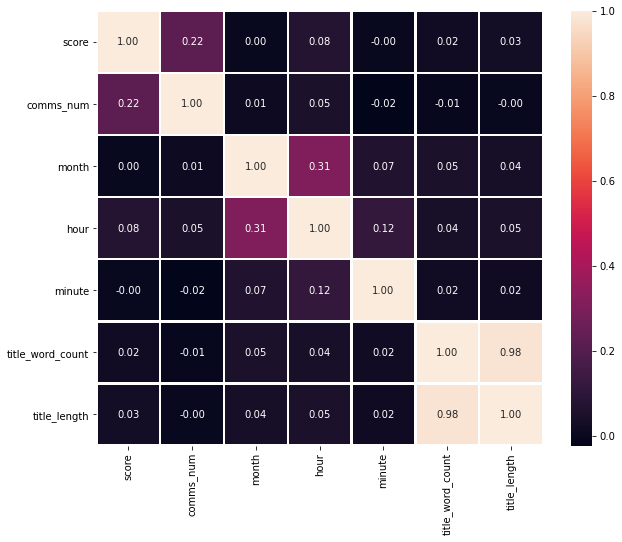

In [14]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.drop(columns=['year']).corr(), annot=True, linewidths=1.5, fmt=".2f");

# Most popular words used in title

In [15]:
def create_text_blob(df, text_column):
    blob_text=[]
    for i, content in df[text_column].items():
        for i in content.split():
            blob_text.append(i.lower())
    return blob_text

blob_text = create_text_blob(df, 'title')
print(blob_text[0:100])

["it's", 'not', 'about', 'the', 'money,', "it's", 'about', 'sending', 'a', 'message.', '🚀💎🙌', 'math', 'professor', 'scott', 'steiner', 'says', 'the', 'numbers', 'spell', 'disaster', 'for', 'gamestop', 'shorts', 'exit', 'the', 'system', 'new', 'sec', 'filing', 'for', 'gme!', 'can', 'someone', 'less', 'retarded', 'than', 'me', 'please', 'interpret?', 'not', 'to', 'distract', 'from', 'gme,', 'just', 'thought', 'our', 'amc', 'brothers', 'should', 'be', 'aware', 'of', 'this', 'we', 'breaking', 'through', 'short', 'stock', "doesn't", 'have', 'an', 'expiration', 'date', 'this', 'is', 'the', 'moment', 'currently', 'holding', 'amc', 'and', 'nok', '-', 'is', 'it', 'retarded', 'that', 'i', 'think', 'i', 'should', 'move', 'it', 'all', 'to', 'gme', 'today?', 'i', 'have', 'nothing', 'to', 'say', 'but', 'bruh', 'i', 'am', 'speechless', 'to', 'the']


# Let's remove the stop words

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  
filtered_sentence = [w for w in blob_text if not w in stop_words]  
filtered_sentence = []  
  
for w in blob_text:  
    if w not in stop_words:  
        filtered_sentence.append(w)  

print(filtered_sentence[0:100])  

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['money,', 'sending', 'message.', '🚀💎🙌', 'math', 'professor', 'scott', 'steiner', 'says', 'numbers', 'spell', 'disaster', 'gamestop', 'shorts', 'exit', 'system', 'new', 'sec', 'filing', 'gme!', 'someone', 'less', 'retarded', 'please', 'interpret?', 'distract', 'gme,', 'thought', 'amc', 'brothers', 'aware', 'breaking', 'short', 'stock', 'expiration', 'date', 'moment', 'currently', 'holding', 'amc', 'nok', '-', 'retarded', 'think', 'move', 'gme', 'today?', 'nothing', 'say', 'bruh', 'speechless', 'moon', '🚀🚀🚀💎💎👋👋', 'need', 'keep', 'movement', 'going,', 'make', 'history!', 'gme', 'premarket', '🍁', 'musk', 'approved', '🎮🛑💎✋', 'done', 'gme', '-', '$ag', '$slv,', "gentleman's", 'short', 'squeeze,', 'driven', 'macro', 'fundamentals', '$gme', 'price', 'nothing', 'fundamentals', 'everything', 'financial', 'economics', 'love', 'retards!!!!', '420', 'wasn’t', 'meme.', 'gme', 

In [17]:
counts = Counter(filtered_sentence)

# Let's print the most popular words, used over 700 times

In [18]:
import plotly.express as px

top_20_words = {}

for (key, value) in counts.items():
   # Check if value is greater than 200 and add to new dictionary
    if value > 700 :
        top_20_words[key] = value
    continue

sorted_top_20_words = dict(sorted(top_20_words.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_20_words.keys()
count = sorted_top_20_words.values()


fig = px.bar(y=word, x=count, text = count)
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [19]:
top_20_words_clean = {}

for (key, value) in counts.items():
    # Check if key length is greater than 3 and value greater than 150 and add to new dictionary
    if len(key)>2 and value > 700 :
        top_20_words_clean[key] = value
    continue

sorted_top_20_words_clean = dict(sorted(top_20_words_clean.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_20_words_clean.keys()
count = sorted_top_20_words_clean.values()

fig = px.bar(y=word, x=count, text = count)
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# Descriptive statistics - body

In [20]:
count = df['body'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

print("Total number of words: ", count.sum(), "words")

Total number of words:  1996657.0 words


In [21]:
print("Average number of words per post: ", round(count.mean(),2), "words")
print("Max number of words per post: ", count.max(), "words")
print("Min number of words per post: ", count.min(), "words")

Average number of words per post:  121.64 words
Max number of words per post:  6140.0 words
Min number of words per post:  1.0 words


In [22]:
df['body_length'] = df['body'].str.len()

print("Total length of a dataset: ", df.body_length.sum(), "characters")
print("Average length of a tweet: ", round(df.body_length.mean(),0), "characters")
print(df.head())

Total length of a dataset:  11913956.0 characters
Average length of a tweet:  726.0 characters
                                               title  score  comms_num  \
0  it's not about the money, it's about sending a...     55          6   
1  math professor scott steiner says the numbers ...    110         23   
2                                    exit the system      0         47   
3  new sec filing for gme! can someone less retar...     29         74   
4  not to distract from gme, just thought our amc...     71        156   

                                                body            timestamp  \
0                                                NaN  2021-01-28 21:37:41   
1                                                NaN  2021-01-28 21:32:10   
2  the ceo of nasdaq pushed to halt trading “to g...  2021-01-28 21:30:35   
3                                                NaN  2021-01-28 21:28:57   
4                                                NaN  2021-01-28 21:26:56  

In [23]:
def create_text_blob(df, text_column):
    blob_text=[]
    for i, content in df[text_column].items():
        for i in str(content).split():
            blob_text.append(i.lower())
    return blob_text

blob_text = create_text_blob(df, 'body')
print(blob_text[0:100])

['nan', 'nan', 'the', 'ceo', 'of', 'nasdaq', 'pushed', 'to', 'halt', 'trading', '“to', 'give', 'investors', 'a', 'chance', 'to', 'recalibrate', 'their', 'positions”.', '[https://mobile.twitter.com/mediaite/status/1354504710695362563](https://mobile.twitter.com/mediaite/status/1354504710695362563)', 'now', 'sec', 'is', 'investigating,', 'brokers', 'are', 'disallowing', 'buying', 'more', 'calls.', 'this', 'is', 'the', 'institutions', 'flat', 'out', 'admitting', 'they', 'will', 'change', 'the', 'rules', 'to', 'bail', 'out', 'the', 'rich', 'but', 'if', 'it', 'happens', 'to', 'us,', 'we', 'get', 'a', '“well', 'shucks', 'you', 'should', 'have', 'known', 'investing', 'is', 'risky!', 'have', 'you', 'tried', 'cutting', 'out', 'avocados', 'and', 'coffee,', 'maybe', 'doing', 'uber', 'on', 'the', 'side?”', 'we', 'may', 'have', 'collectively', 'driven', 'up', 'enough', 'sentiment', 'in', 'wall', 'street', 'to', 'make', 'other', 'big', 'players', 'go', 'long', 'on', 'gme', 'with']


In [24]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  
stop_words.add('nan')
filtered_sentence = [w for w in blob_text if not w in stop_words]  
filtered_sentence = []  
  
for w in blob_text:  
    if w not in stop_words:  
        filtered_sentence.append(w)  

print(filtered_sentence[0:100])  

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['ceo', 'nasdaq', 'pushed', 'halt', 'trading', '“to', 'give', 'investors', 'chance', 'recalibrate', 'positions”.', '[https://mobile.twitter.com/mediaite/status/1354504710695362563](https://mobile.twitter.com/mediaite/status/1354504710695362563)', 'sec', 'investigating,', 'brokers', 'disallowing', 'buying', 'calls.', 'institutions', 'flat', 'admitting', 'change', 'rules', 'bail', 'rich', 'happens', 'us,', 'get', '“well', 'shucks', 'known', 'investing', 'risky!', 'tried', 'cutting', 'avocados', 'coffee,', 'maybe', 'uber', 'side?”', 'may', 'collectively', 'driven', 'enough', 'sentiment', 'wall', 'street', 'make', 'big', 'players', 'go', 'long', 'gme', 'us', '(we', 'money', 'move', 'stock', 'much', 'alone).', 'didn’t', 'hurt', 'wall', 'street', 'whole,', 'funds', 'went', 'others', 'went', 'profited', 'shorts', 'us.', 'media', 'wants', 'pin', 'blame', 'us.', 'crystal',

In [25]:
counts_body = Counter(filtered_sentence)

In [26]:
import plotly.express as px

top_20_words = {}

for (key, value) in counts_body.items():
   # Check if value is greater than 3000 and add to new dictionary
    if value != "nan" and value > 3000:
        top_20_words[key] = value
    continue

sorted_top_20_words = dict(sorted(top_20_words.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_20_words.keys()
count = sorted_top_20_words.values()


fig = px.bar(y=word, x=count, text = count)
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# **Let's see what are the most popular tickers mentioned in the body text**

In [27]:
nyse_tickers = pd.read_csv("../input/tickers/nyse-listed_csv.csv")
other_tickers = pd.read_csv("../input/tickers/other-listed_csv.csv")

In [28]:
nyse_tickers.head()

,ACT Symbol,Company Name
0,A,"Agilent Technologies, Inc. Common Stock"
1,AA,Alcoa Inc. Common Stock
2,AA$B,Alcoa Inc. Depository Shares Representing 1/10...
3,AAC,"AAC Holdings, Inc. Common Stock"
4,AAN,"Aaron's, Inc. Common Stock"


In [29]:
nyse_tickers_list = list(nyse_tickers['ACT Symbol'].str.lower())
other_tickers_list = list(other_tickers['ACT Symbol'].str.lower())
nyse_tickers_list[0:10]

['a', 'aa', 'aa$b', 'aac', 'aan', 'aap', 'aat', 'aav', 'ab', 'abb']

In [30]:
import plotly.express as px

top_words = {}

for (key, value) in counts_body.items():
   # Check if value is greater than 100 and add to new dictionary
    if key in nyse_tickers_list and value > 300: 
        top_words[key] = value
    continue
    
sorted_top_words = dict(sorted(top_words.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_words.keys()
count = sorted_top_words.values()

fig = px.bar(y=word, x=count, text = count, title='Nyse Tickers')
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()



In [31]:
import plotly.express as px

top_words = {}

for (key, value) in counts_body.items():
   # Check if value is greater than 100 and add to new dictionary
    if key in other_tickers_list and value > 500: 
        top_words[key] = value
    continue
    
sorted_top_words = dict(sorted(top_words.items(), key=lambda item: item[1], reverse=False))

word = sorted_top_words.keys()
count = sorted_top_words.values()

fig = px.bar(y=word, x=count, text = count, title='Other Tickers')
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()